In [3]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from ipywidgets import interact, interactive, fixed


In [9]:
def lin(a,b,x): return a*x+b


In [10]:
a = 4
b =3


In [11]:
n=30
x = random(n)
y = lin(a,b,x)

In [12]:
x

array([0.39676028, 0.75516343, 0.42866554, 0.05143602, 0.31768629,
       0.22704045, 0.04159962, 0.91462999, 0.85339773, 0.74395095,
       0.12796833, 0.2268943 , 0.92122363, 0.69261464, 0.36932341,
       0.85825176, 0.82750525, 0.55487805, 0.66976901, 0.67913485,
       0.8940152 , 0.82093155, 0.76679602, 0.04798824, 0.41202521,
       0.30246017, 0.62609341, 0.81195611, 0.34627025, 0.81693835])

In [13]:
y

array([4.58704113, 6.02065372, 4.71466218, 3.20574407, 4.27074514,
       3.90816178, 3.16639847, 6.65851995, 6.41359091, 5.9758038 ,
       3.51187333, 3.90757718, 6.68489454, 5.77045856, 4.47729364,
       6.43300703, 6.31002099, 5.21951222, 5.67907603, 5.7165394 ,
       6.57606082, 6.28372622, 6.0671841 , 3.19195298, 4.64810086,
       4.20984069, 5.50437364, 6.24782446, 4.385081  , 6.26775341])

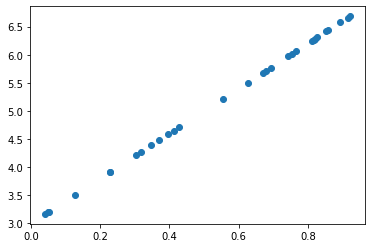

In [14]:
plt.scatter(x,y)

In [15]:
def sse(y,y_pred): 
    return ((y-y_pred)**2).sum()
def loss(y,a,b,x): 
    return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): 
    return np.sqrt(loss(y,a,b,x)/n)

In [16]:
a0=-1.
b0=1.
avg_loss(y, a0, b0, x)

4.960195797921057

In [19]:
Ir = 0.01

In [30]:
def upd():
    global a0, b0
    
    # make a prediction using the current weights
    y_pred = lin(a0, b0, x)
    
    # calculate the derivate of the loss
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    
    # update our weights by moving in direction of steepest descent
    a0 -= lr*dyda.mean()
    b0 -= lr*dydb.mean()

In [37]:

fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a0,b0,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a0,b0,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani
